In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
x=df.iloc[:,3:]

In [ ]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


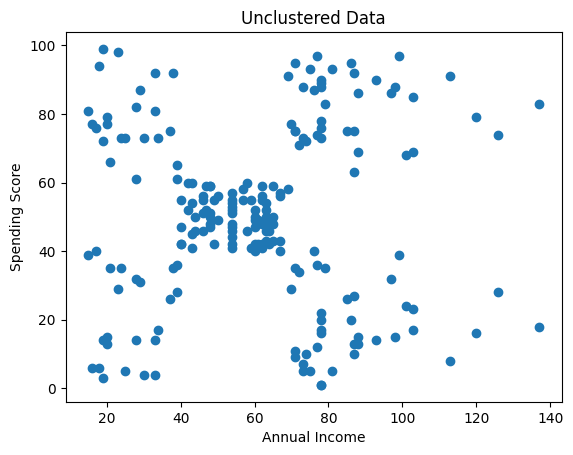

In [ ]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [ ]:
km=KMeans(n_clusters=3)

In [ ]:
km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
#SSE
km.inertia_

106348.37306211122

In [ ]:
#List of SSE
sse = []
for k in range(1,16):
  km=KMeans(n_clusters=k)
  km.fit_predict(x)
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[269981.28,
 183499.07470288628,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25011.839349156588,
 21862.092672182895,
 19646.482018947238,
 17700.979383774124,
 15838.717785514087,
 14686.893462451528,
 12913.464244089242,
 11726.575990917292]

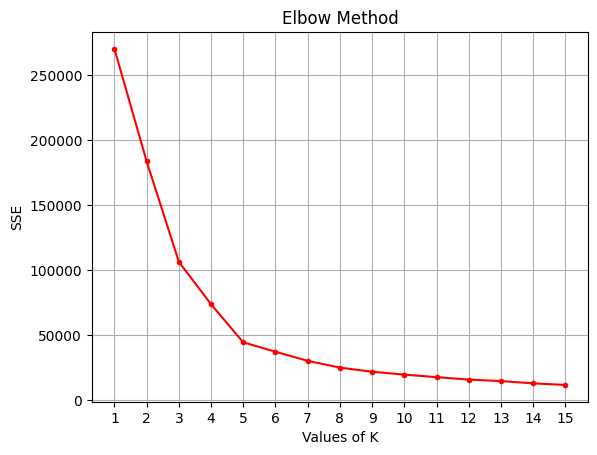

In [ ]:
plt.title('Elbow Method')
plt.xlabel('Values of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks (range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
#List of Silhouette Score
silh = []
for k in range(2,16):
  km=KMeans(n_clusters=k)
  labels=km.fit_predict(x)
  score=silhouette_score(x,labels)
  silh.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5288104473798049,
 0.45492755850983463,
 0.4595491760122954,
 0.4513533436906335,
 0.45115663312297194,
 0.4525053309122252,
 0.4325293847024132,
 0.4182058100650696,
 0.42027171308311034]

<BarContainer object of 14 artists>

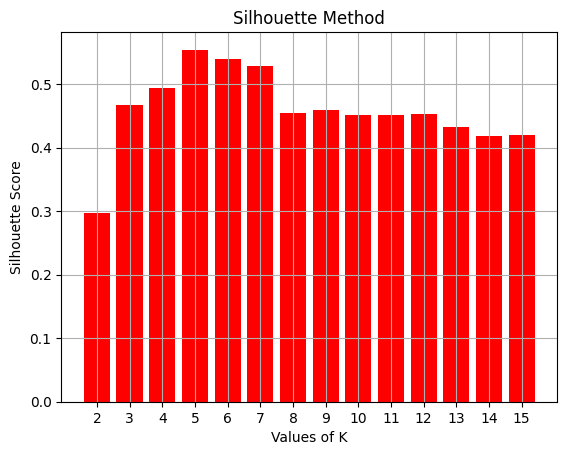

In [ ]:
plt.title('Silhouette Method')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.xticks (range(2,16))
plt.bar(range(2,16),silh,color='red')

In [ ]:
#KMeans Clustering
km=KMeans(n_clusters=5,random_state=0)

In [ ]:
labels=km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
#Centroids
cent=km.cluster_centers_

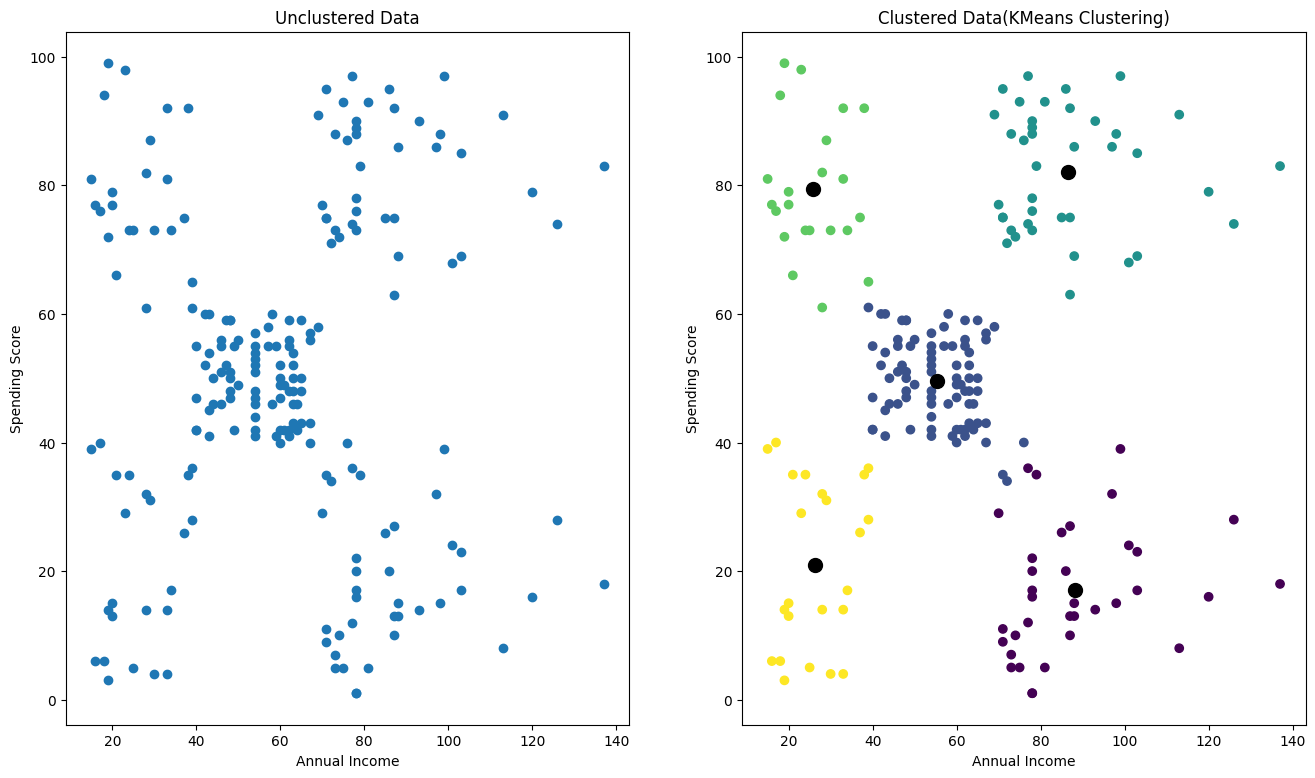

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('Clustered Data(KMeans Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='black')

In [ ]:
#Agglomerative Clustering
agl=AgglomerativeClustering(n_clusters=5)

In [ ]:
alabels=agl.fit_predict(x)

In [ ]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

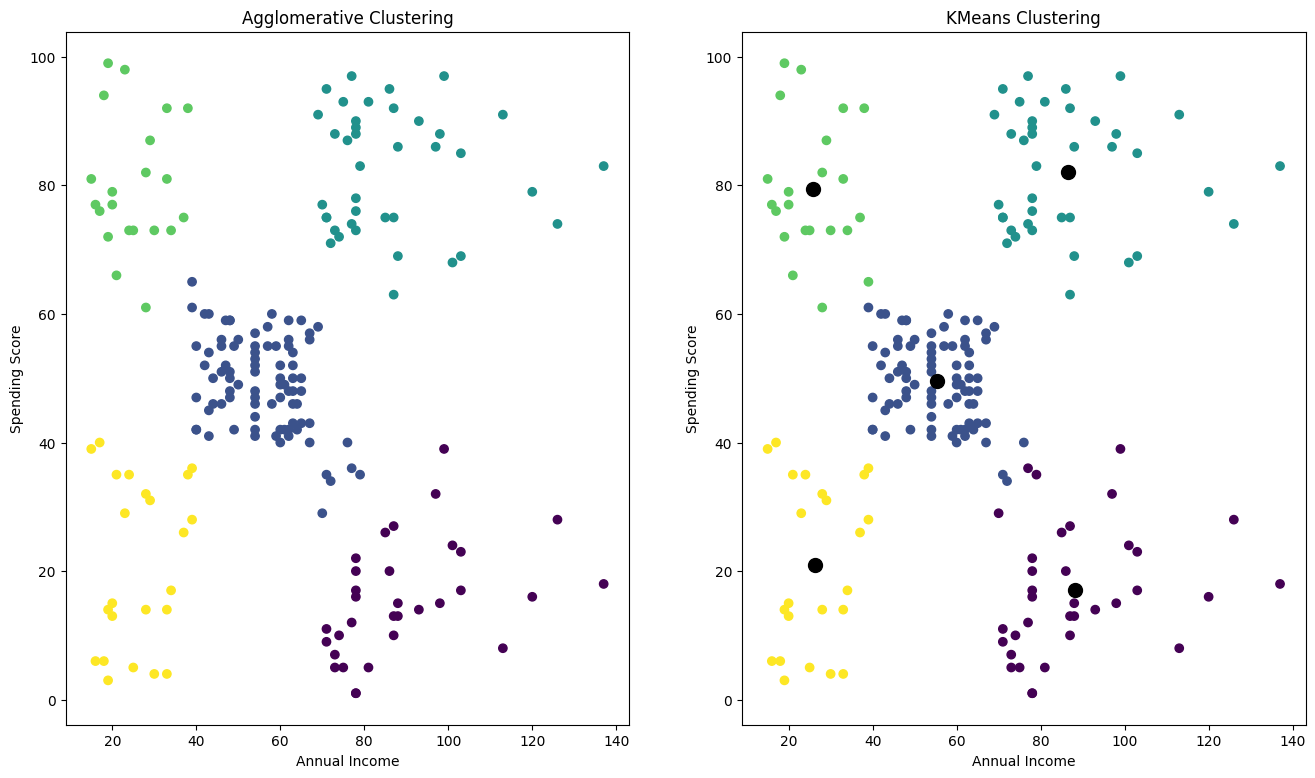

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabels)

plt.subplot(1,2,2)
plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='black')